In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns; sns.set()
np.random.seed(1234)

In [2]:
def mkts(length=4001, y0=1.0):
    X = [[0, 1]] # card was printed
    y = [y0]
    t_since_reprint = 0
    for i in range(length-1):
        reprint = 0
        rdev = np.random.rand()
        
        if rdev > 0.995 and t_since_reprint > 300:
            t_since_reprint = 0
            reprint = 1
        else:
            t_since_reprint += 1
            
        trend = 0.005
        if t_since_reprint > 0: # price doesn't instantly respond to reprints
            if t_since_reprint < 20:
                trend = -0.007
            elif t_since_reprint < 200:
                trend = -0.002
        
        X.append([y[-1], reprint])
        y.append(y[-1] + trend + np.random.randn()*0.00001)
    return np.array(X), np.array(y)

In [3]:
X, y = mkts()

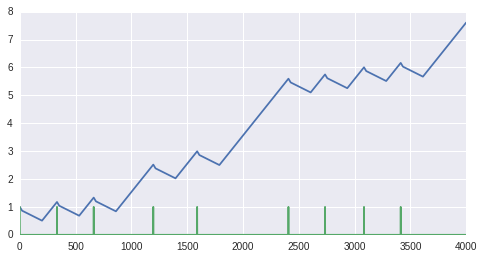

In [4]:
fig = sns.plt.figure(figsize=(8, 4))
sns.plt.plot(y)
sns.plt.plot(X[:, 1])

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers.noise import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Using TensorFlow backend.


gradient: 0.00165178747365


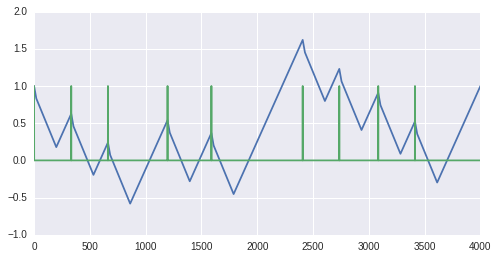

In [6]:
# subtract the overall trend
gradient = (y[-1] - y[0])/4001
print 'gradient:',gradient
y = y - gradient * np.arange(len(y))

fig = sns.plt.figure(figsize=(8, 4))
sns.plt.plot(y)
sns.plt.plot(X[:, 1])

In [7]:
ydiff = np.diff(y)
mm = StandardScaler()
ydiff = mm.fit_transform(ydiff)
X[1:, 0] = ydiff
print ydiff.shape

Xrnn = np.reshape(X, (X.shape[0], 1, X.shape[1]))[0:len(ydiff)]
print Xrnn.shape

for i in np.arange(5, 0, -1):
    print 'Features:',Xrnn[len(Xrnn)-i, 0], '/ Label:', ydiff[len(ydiff)-i]

(4000,)
(4000, 1, 2)
Features: [ 0.86790339  0.        ] / Label: 0.872783745726
Features: [ 0.87278375  0.        ] / Label: 0.87461829939
Features: [ 0.8746183  0.       ] / Label: 0.868895377008
Features: [ 0.86889538  0.        ] / Label: 0.875769007843
Features: [ 0.87576901  0.        ] / Label: 0.87144604703


/home/erlend/miniconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/erlend/miniconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


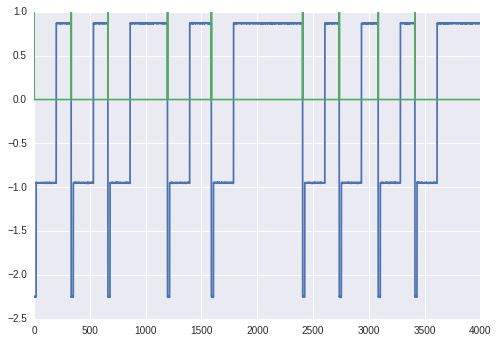

In [8]:
sns.plt.plot(ydiff)
sns.plt.plot(Xrnn[:,:,1])

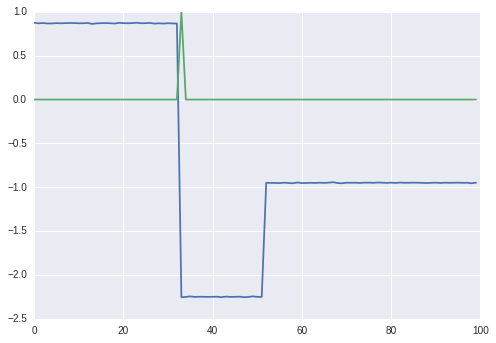

In [9]:
# zoom in
sns.plt.plot(ydiff[300:400])
sns.plt.plot(Xrnn[300:400][:,:,1])

In [10]:
from keras.callbacks import History 
history = History()

# create and fit the LSTM network
model = Sequential()
#model.add(GaussianNoise(batch_input_shape=(100, 1, 2), sigma=0.9))
#model.add(Dense(12, input_dim=2, activation='relu'))
model.add(LSTM(12, batch_input_shape=(100, 1, 2), stateful=True, return_sequences=False))
#model.add(LSTM(12, stateful=True))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

X = X[0:len(ydiff)]

logloss = []
nb_epochs = 100
for i in range(nb_epochs):
    model.fit(Xrnn[:-1000], ydiff[:-1000], 
    #model.fit(X[:-1000], ydiff[:-1000],
              nb_epoch=1, batch_size=100, 
              verbose=2, shuffle=False,
               callbacks=[history])
    logloss.append(history.history['loss'][0])
    model.reset_states()

Epoch 1/1
1s - loss: 0.8570
Epoch 1/1
0s - loss: 0.7677
Epoch 1/1
0s - loss: 0.6945
Epoch 1/1
0s - loss: 0.6238
Epoch 1/1
0s - loss: 0.5678
Epoch 1/1
0s - loss: 0.5183
Epoch 1/1
0s - loss: 0.4696
Epoch 1/1
0s - loss: 0.4302
Epoch 1/1
0s - loss: 0.3843
Epoch 1/1
0s - loss: 0.3553
Epoch 1/1
0s - loss: 0.3230
Epoch 1/1
0s - loss: 0.3088
Epoch 1/1
0s - loss: 0.2770
Epoch 1/1
0s - loss: 0.2606
Epoch 1/1
0s - loss: 0.2417
Epoch 1/1
0s - loss: 0.2227
Epoch 1/1
0s - loss: 0.2112
Epoch 1/1
0s - loss: 0.1974
Epoch 1/1
0s - loss: 0.1779
Epoch 1/1
0s - loss: 0.1688
Epoch 1/1
0s - loss: 0.1670
Epoch 1/1
0s - loss: 0.1669
Epoch 1/1
0s - loss: 0.1551
Epoch 1/1
0s - loss: 0.1525
Epoch 1/1
0s - loss: 0.1410
Epoch 1/1
0s - loss: 0.1459
Epoch 1/1
0s - loss: 0.1334
Epoch 1/1
0s - loss: 0.1363
Epoch 1/1
0s - loss: 0.1318
Epoch 1/1
0s - loss: 0.1302
Epoch 1/1
0s - loss: 0.1303
Epoch 1/1
0s - loss: 0.1226
Epoch 1/1
0s - loss: 0.1256
Epoch 1/1
0s - loss: 0.1176
Epoch 1/1
0s - loss: 0.1222
Epoch 1/1
0s - loss:

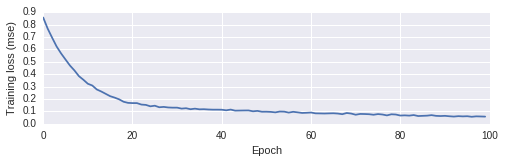

In [11]:
fig = sns.plt.figure(figsize=(8, 2))
sns.plt.plot(logloss)
sns.plt.xlabel('Epoch')
sns.plt.ylabel('Training loss (mse)')

In [12]:
#bootstrap = model.predict(Xrnn[:-1000], batch_size=100)
#bootstrap = model.predict(X[:-1000], batch_size=20)
preds = model.predict(Xrnn[-1000:], batch_size=100)
#preds = model.predict(X[-1000:], batch_size=20)

print preds.shape

(1000, 1)


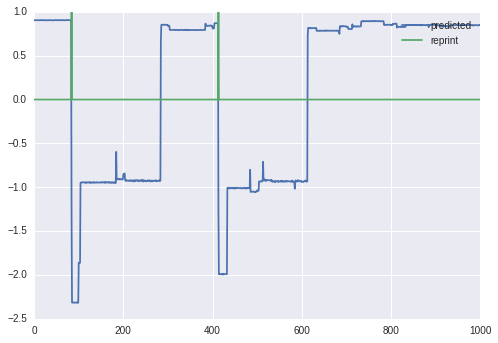

In [13]:
sns.plt.plot(preds.flatten(), label='predicted')
sns.plt.plot(X[-1000:, 1], label='reprint')
sns.plt.legend()

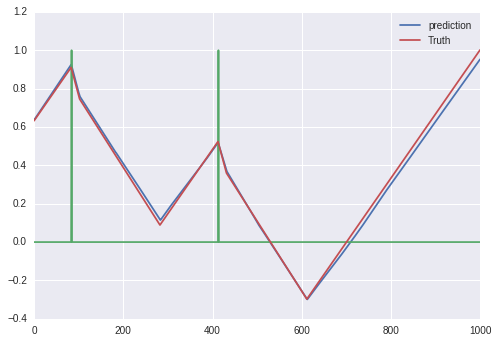

In [14]:
unscaled_preds = mm.inverse_transform(preds.flatten())
shift = y[-1000]
sns.plt.plot(np.cumsum(unscaled_preds)+shift, label='prediction')
sns.plt.plot(X[-1000:, 1])
sns.plt.plot(y[-1000:], label='Truth')
sns.plt.legend()

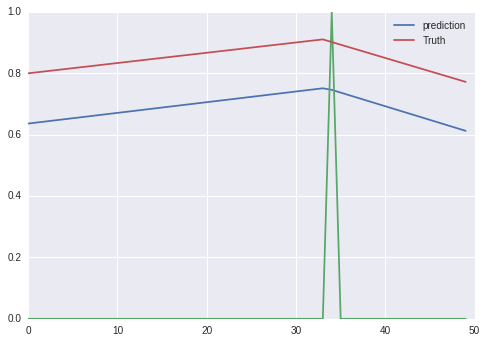

In [15]:
sns.plt.plot(np.cumsum(unscaled_preds[50:100])+shift, label='prediction')
sns.plt.plot(X[-950:-900, 1])
sns.plt.plot(y[-950:-900], label='Truth')
sns.plt.legend()

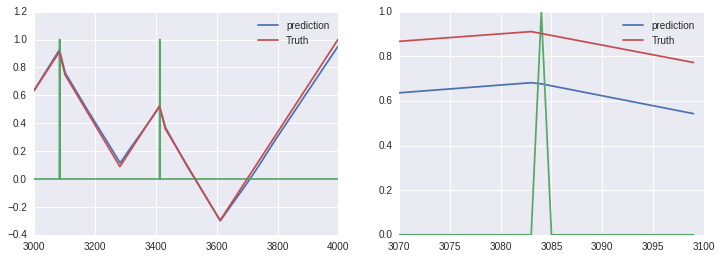

In [16]:
fig, ax = sns.plt.subplots(1, 2, figsize=(12, 4))
x_range = range(3000, 4000)
ax[0].plot(x_range, np.cumsum(unscaled_preds)+shift, label='prediction')
ax[0].plot(x_range, X[-1000:, 1])
ax[0].plot(x_range, y[-1000:], label='Truth')
ax[0].legend()

x_range2 = range(3070, 3100)
ax[1].plot(x_range2, np.cumsum(unscaled_preds[70:100])+shift, label='prediction')
ax[1].plot(x_range2, X[-930:-900, 1])
ax[1].plot(x_range2, y[-930:-900], label='Truth')
ax[1].legend()